# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.774569e+01     1.443574e+01
 * time: 0.0015940666198730469
     1     3.431410e+01     9.861818e+00
 * time: 0.004094123840332031
     2     3.253909e+01     1.623862e+01
 * time: 0.009112119674682617
     3     2.200006e+01     2.687135e+00
 * time: 0.014955997467041016
     4     2.055477e+01     3.625400e+00
 * time: 0.019989013671875
     5     1.941875e+01     2.127618e+00
 * time: 0.02498006820678711
     6     1.879338e+01     1.776343e+00
 * time: 0.0292661190032959
     7     1.828678e+01     1.924014e+00
 * time: 0.033753156661987305
     8     1.779031e+01     1.637251e+00
 * time: 0.038175106048583984
     9     1.747601e+01     1.244005e+00
 * time: 0.04264497756958008
    10     1.726166e+01     8.939380e-01
 * time: 0.04704403877258301
    11     1.715797e+01     7.186110e-01
 * time: 0.0756840705871582
    12     1.712435e+01     7.016568e-01
 * time: 0.07858514785766602
    13     1.708424e+01     5.967136e-01
 * ti

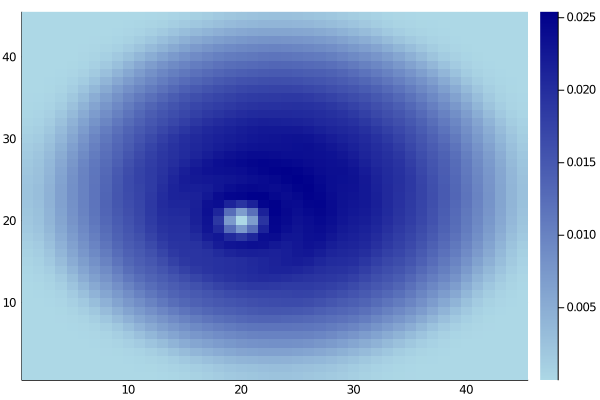

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)